In [2]:

import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
import itertools

In [3]:
df_mod = pd.read_csv('data frame consigna.csv')
df_norm =pd.read_csv('data frame analisis.csv')

In [4]:
df_mod

,PROVINCIA,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score,poverty_index,N_pop,nivel_pop
0,Buenos Aires,2.926899e+08,NaN,8.167798,5.511856,0.766168,NaN,4.4,15625084.0,0.000006,0.004836,3.551157e+06,Middle,1.000000,A
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,NaN,1.5,367828.0,0.000005,0.004502,2.452248e+05,High,0.006114,C
2,Córdoba,6.936374e+07,NaN,5.382380,10.436086,1.035056,45.7640,NaN,681055.0,0.000011,0.010175,6.893503e+05,Low,0.026519,B
3,Corrientes,7.968013e+06,5.602420,12.747191,17.438858,3.864265,62.1103,5.9,992595.0,0.000004,0.004495,1.682386e+05,High,0.046813,B
4,Chaco,9.832643e+06,7.517580,15.862619,NaN,2.577462,65.5104,7.5,1055259.0,0.000003,0.003605,1.407033e+05,High,0.050895,B
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.0,509108.0,0.000016,0.004498,1.697054e+05,Middle,0.015318,C
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,1.887188,48.6571,3.1,1235994.0,0.000006,0.004679,3.987101e+05,Low,0.062668,A
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,NaN,530162.0,0.000004,0.003440,3.272710e+04,High,0.016689,B
8,Jujuy,6.484938e+06,2.151390,NaN,12.483179,0.721295,54.1615,3.7,673307.0,0.000003,0.003958,1.819785e+05,High,0.026014,B
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.2,318951.0,0.000019,0.005415,4.429922e+04,Low,0.002931,C


In [5]:
imputer = SimpleImputer(strategy='median')
columnas_numeric = df_mod.select_dtypes(include=['float64', 'int']).columns

df_mod[columnas_numeric] = imputer.fit_transform(df_mod[columnas_numeric])

In [6]:
df_mod

,PROVINCIA,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap,Score,poverty_index,N_pop,nivel_pop
0,Buenos Aires,2.926899e+08,2.868235,8.167798,5.511856,0.766168,50.2653,4.40,15625084.0,0.000006,0.004836,3.551157e+06,Middle,1.000000,A
1,Catamarca,6.150949e+06,2.344140,9.234095,10.464484,0.951963,50.2653,1.50,367828.0,0.000005,0.004502,2.452248e+05,High,0.006114,C
2,Córdoba,6.936374e+07,2.868235,5.382380,10.436086,1.035056,45.7640,3.75,681055.0,0.000011,0.010175,6.893503e+05,Low,0.026519,B
3,Corrientes,7.968013e+06,5.602420,12.747191,17.438858,3.864265,62.1103,5.90,992595.0,0.000004,0.004495,1.682386e+05,High,0.046813,B
4,Chaco,9.832643e+06,7.517580,15.862619,10.865881,2.577462,65.5104,7.50,1055259.0,0.000003,0.003605,1.407033e+05,High,0.050895,B
5,Chubut,1.774785e+07,1.548060,8.051752,8.044618,0.586309,39.5473,3.00,509108.0,0.000016,0.004498,1.697054e+05,Middle,0.015318,C
6,Entre Ríos,2.074341e+07,3.185580,7.288751,18.794568,1.887188,48.6571,3.10,1235994.0,0.000006,0.004679,3.987101e+05,Low,0.062668,A
7,Formosa,3.807057e+06,4.610640,17.035583,28.004985,2.268974,65.8126,3.75,530162.0,0.000004,0.003440,3.272710e+04,High,0.016689,B
8,Jujuy,6.484938e+06,2.151390,8.956243,12.483179,0.721295,54.1615,3.70,673307.0,0.000003,0.003958,1.819785e+05,High,0.026014,B
9,La Pampa,6.990262e+06,1.539300,3.398774,16.505714,0.204093,45.4764,7.20,318951.0,0.000019,0.005415,4.429922e+04,Low,0.002931,C


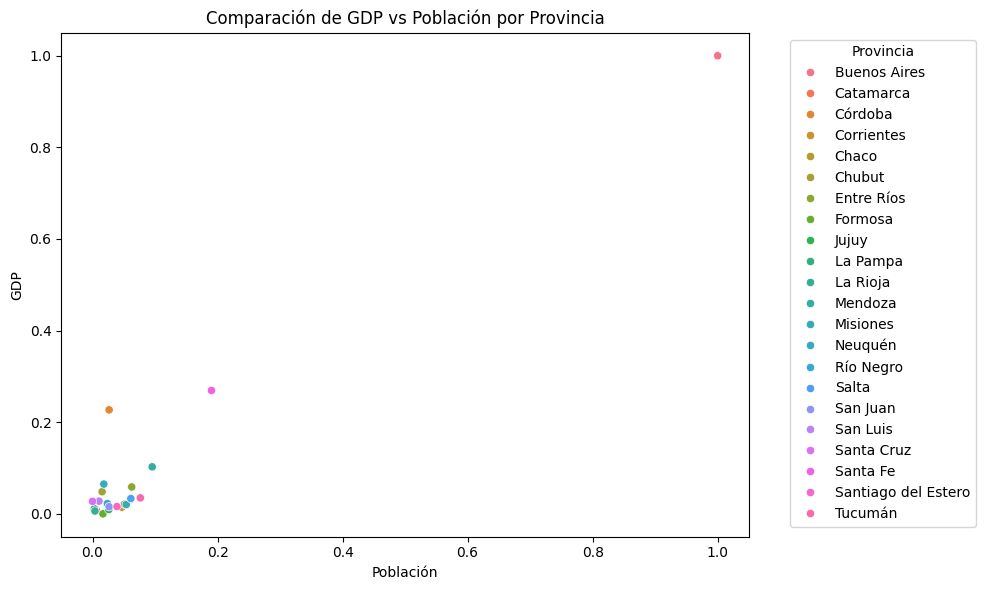

In [7]:
# Gráfico de dispersión usando los datos de df_norm y las provincias de df_mod
# QUEDA RARO, CATAMARCA ARRIBA DE TODO?

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_norm["pop"], y=df_norm["gdp"], hue=df_mod["PROVINCIA"])
plt.xlabel("Población")
plt.ylabel("GDP")
plt.title("Comparación de GDP vs Población por Provincia")
plt.legend(title="Provincia", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [8]:
# Gráfico de dispersión que compara el GDP de cada provincia con la población

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="pop", y="gdp", hue="PROVINCIA")
plt.xlabel("Población")
plt.ylabel("GDP")
plt.title("Comparación de GDP vs Población por Provincia")
plt.legend(title="Provincia", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Agregar columna de GDP per cápita a df_mod
df_mod["gdp_per_capita"] = df_mod["gdp"] / df_mod["pop"]
df_mod

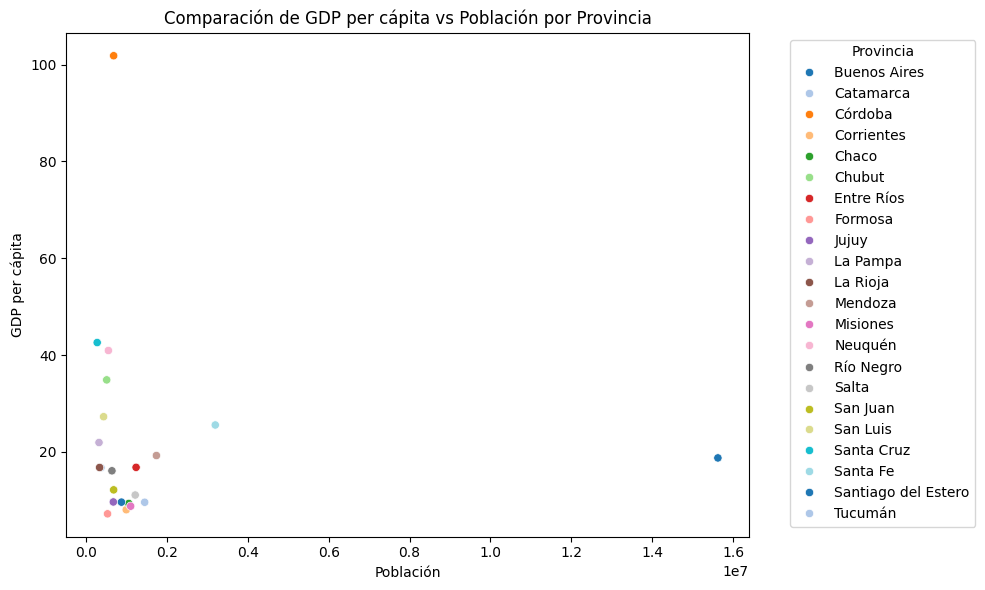

In [ ]:
# Gráfico de dispersión que compara el GDP per cápita con la población, con escala de colores más diferenciada

plt.figure(figsize=(10, 6))
palette = sns.color_palette("tab20", n_colors=df_mod["PROVINCIA"].nunique())
sns.scatterplot(data=df_mod, x="pop", y="gdp_per_capita", hue="PROVINCIA", palette=palette)
plt.xlabel("Población")
plt.ylabel("GDP per cápita")
plt.title("Comparación de GDP per cápita vs Población por Provincia")
plt.legend(title="Provincia", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Puede ser que cordoba este donde esta porque se le imputo la mediana de poblacion,
# y sabemos en la realidad que es una provincia de las mas pobladas. 
# Quizas si se le imputara la media o la moda, estaria en otro lugar.

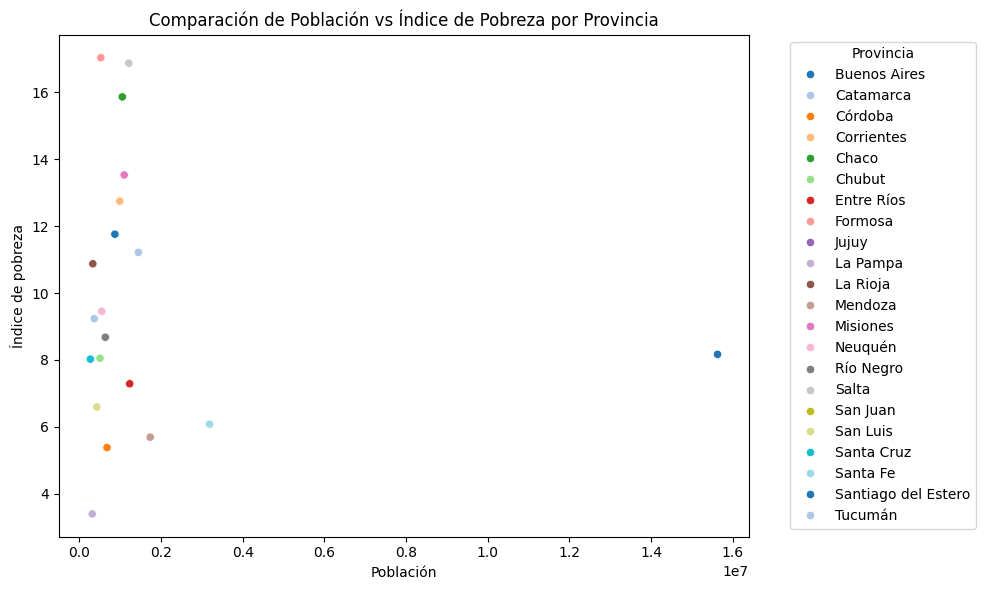

In [ ]:
# Gráfico de dispersión que compara la población con el índice de pobreza, usando la misma escala de colores diferenciada

plt.figure(figsize=(10, 6))
palette = sns.color_palette("tab20", n_colors=df_mod["PROVINCIA"].nunique())
sns.scatterplot(data=df_mod, x="pop", y="poverty", hue="PROVINCIA", palette=palette)
plt.xlabel("Población")
plt.ylabel("Índice de pobreza")
plt.title("Comparación de Población vs Índice de Pobreza por Provincia")
plt.legend(title="Provincia", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\diren\AppData\Local\Temp\ipykernel_23124\3080662239.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(subset["pop"], subset["poverty"], label=provincia, color=color, marker=marker, s=80, edgecolor='black', alpha=0.8)
C:\Users\diren\AppData\Local\Temp\ipykernel_23124\3080662239.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(subset["pop"], subset["poverty"], label=provincia, color=color, marker=marker, s=80, edgecolor='black', alpha=0.8)
C:\Users\diren\AppData\Local\Temp\ipykernel_23124\3080662239.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('|').  Matplotlib is ignoring the edgecolor in favor of the facecolor. 

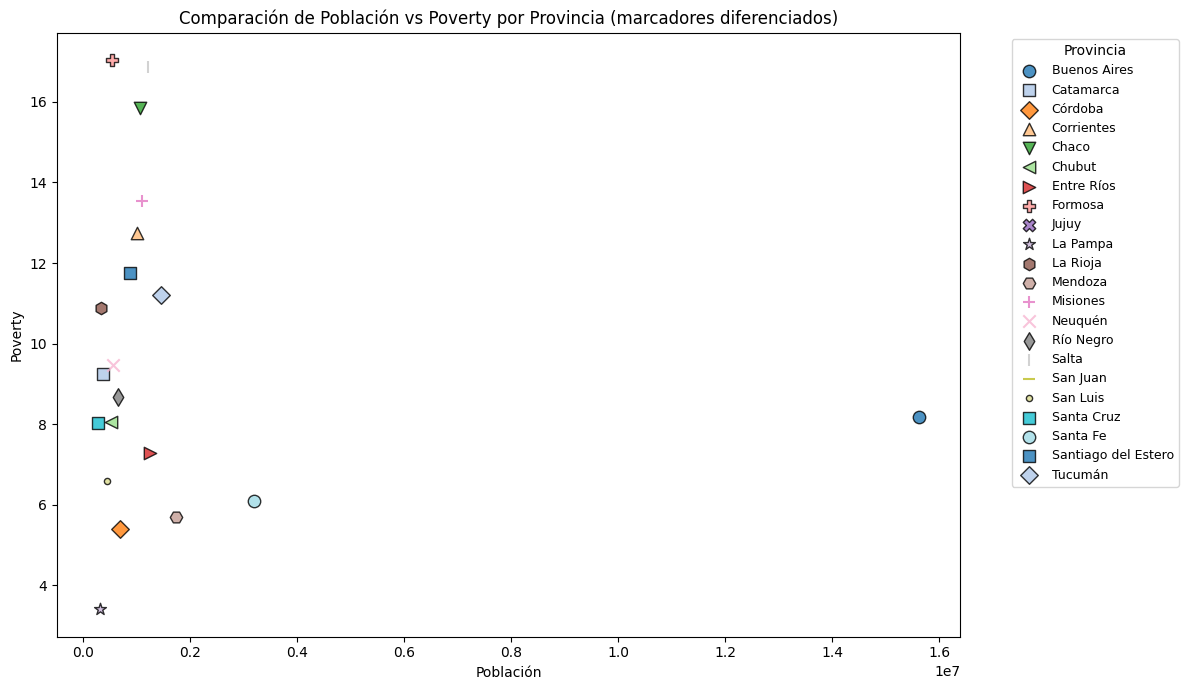

In [ ]:
# Gráfico de dispersión que compara la población con la pobreza, usando diferentes marcadores para cada provincia



plt.figure(figsize=(12, 7))

# Crear una lista de marcadores y colores
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'P', 'X', '*', 'h', 'H', '+', 'x', 'd', '|', '_', '.', ',']
colors = sns.color_palette("tab20", n_colors=df_mod["PROVINCIA"].nunique())
marker_cycle = itertools.cycle(markers)
color_cycle = itertools.cycle(colors)

# Graficar cada provincia con un marcador y color diferente
for provincia, color, marker in zip(df_mod["PROVINCIA"].unique(), color_cycle, marker_cycle):
    subset = df_mod[df_mod["PROVINCIA"] == provincia]
    plt.scatter(subset["pop"], subset["poverty"], label=provincia, color=color, marker=marker, s=80, edgecolor='black', alpha=0.8)

plt.xlabel("Población")
plt.ylabel("Poverty")
plt.title("Comparación de Población vs Poverty por Provincia (marcadores diferenciados)")
plt.legend(title="Provincia", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

In [ ]:
# Gráfico de dispersión que compara la población con la pobreza, usando diferentes marcadores para cada provincia



plt.figure(figsize=(12, 7))

# Crear una lista de marcadores y colores
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'P', 'X', '*', 'h', 'H', '+', 'x', 'd', '|', '_', '.', ',']
colors = sns.color_palette("tab20", n_colors=df_mod["PROVINCIA"].nunique())
marker_cycle = itertools.cycle(markers)
color_cycle = itertools.cycle(colors)

# Graficar cada provincia con un marcador y color diferente
for provincia, color, marker in zip(df_mod["PROVINCIA"].unique(), color_cycle, marker_cycle):
    subset = df_mod[df_mod["PROVINCIA"] == provincia]
    plt.scatter(subset["pop"], subset["iliteracy"], label=provincia, color=color, marker=marker, s=80, edgecolor='black', alpha=0.8)

plt.xlabel("Población")
plt.ylabel("Poverty")
plt.title("Comparación de Población vs Poverty por Provincia (marcadores diferenciados)")
plt.legend(title="Provincia", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

C:\Users\diren\AppData\Local\Temp\ipykernel_23124\3910415977.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(subset["pop"], subset["illiteracy"], label=provincia, color=color, marker=marker, s=80, edgecolor='black', alpha=0.8)
C:\Users\diren\AppData\Local\Temp\ipykernel_23124\3910415977.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(subset["pop"], subset["illiteracy"], label=provincia, color=color, marker=marker, s=80, edgecolor='black', alpha=0.8)
C:\Users\diren\AppData\Local\Temp\ipykernel_23124\3910415977.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('|').  Matplotlib is ignoring the edgecolor in favor of the facec

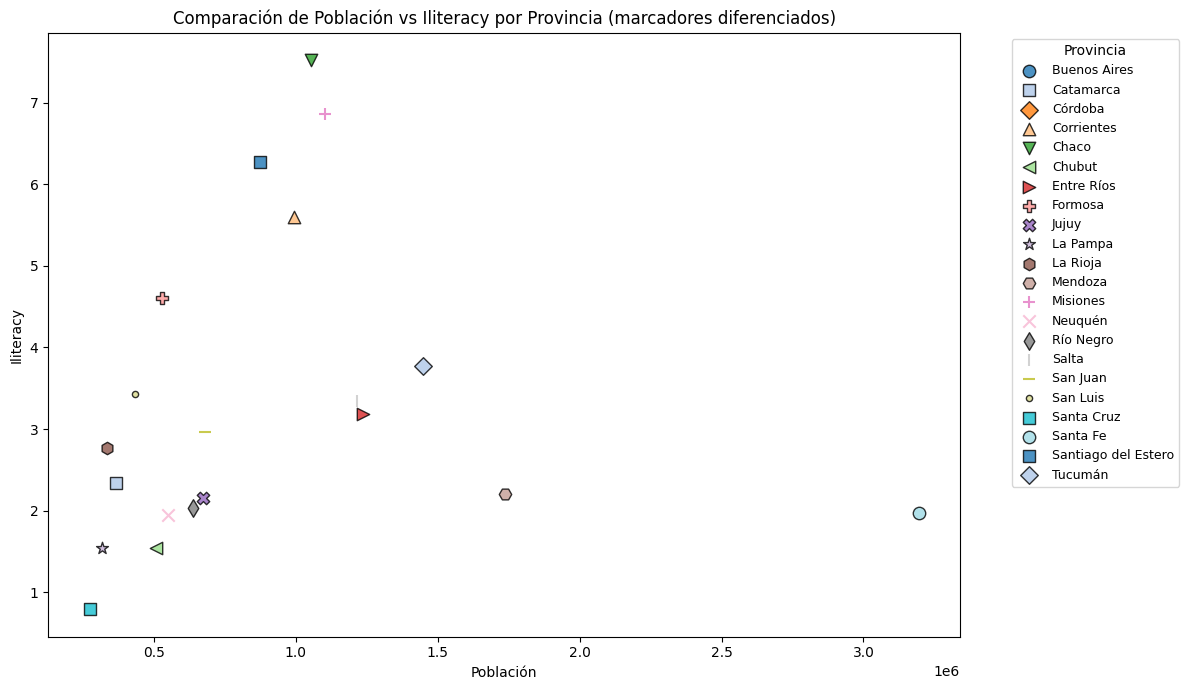

In [ ]:
# Gráfico de dispersión que compara la población con la tasa de analfabetismo, usando diferentes marcadores para cada provincia

plt.figure(figsize=(12, 7))

# Crear una lista de marcadores y colores
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'P', 'X', '*', 'h', 'H', '+', 'x', 'd', '|', '_', '.', ',']
colors = sns.color_palette("tab20", n_colors=df_mod["PROVINCIA"].nunique())
marker_cycle = itertools.cycle(markers)
color_cycle = itertools.cycle(colors)

# Graficar cada provincia con un marcador y color diferente
for provincia, color, marker in zip(df_mod["PROVINCIA"].unique(), color_cycle, marker_cycle):
    subset = df_mod[df_mod["PROVINCIA"] == provincia]
    plt.scatter(subset["pop"], subset["illiteracy"], label=provincia, color=color, marker=marker, s=80, edgecolor='black', alpha=0.8)

plt.xlabel("Población")
plt.ylabel("Iliteracy")
plt.title("Comparación de Población vs Iliteracy por Provincia (marcadores diferenciados)")
plt.legend(title="Provincia", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

C:\Users\diren\AppData\Local\Temp\ipykernel_23124\3277476482.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(subset["pop"], subset["movie_theatres_per_cap"], label=provincia, color=color, marker=marker, s=80, edgecolor='black', alpha=0.8)
C:\Users\diren\AppData\Local\Temp\ipykernel_23124\3277476482.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(subset["pop"], subset["movie_theatres_per_cap"], label=provincia, color=color, marker=marker, s=80, edgecolor='black', alpha=0.8)
C:\Users\diren\AppData\Local\Temp\ipykernel_23124\3277476482.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('|').  Matplotlib is ignoring the edgecol

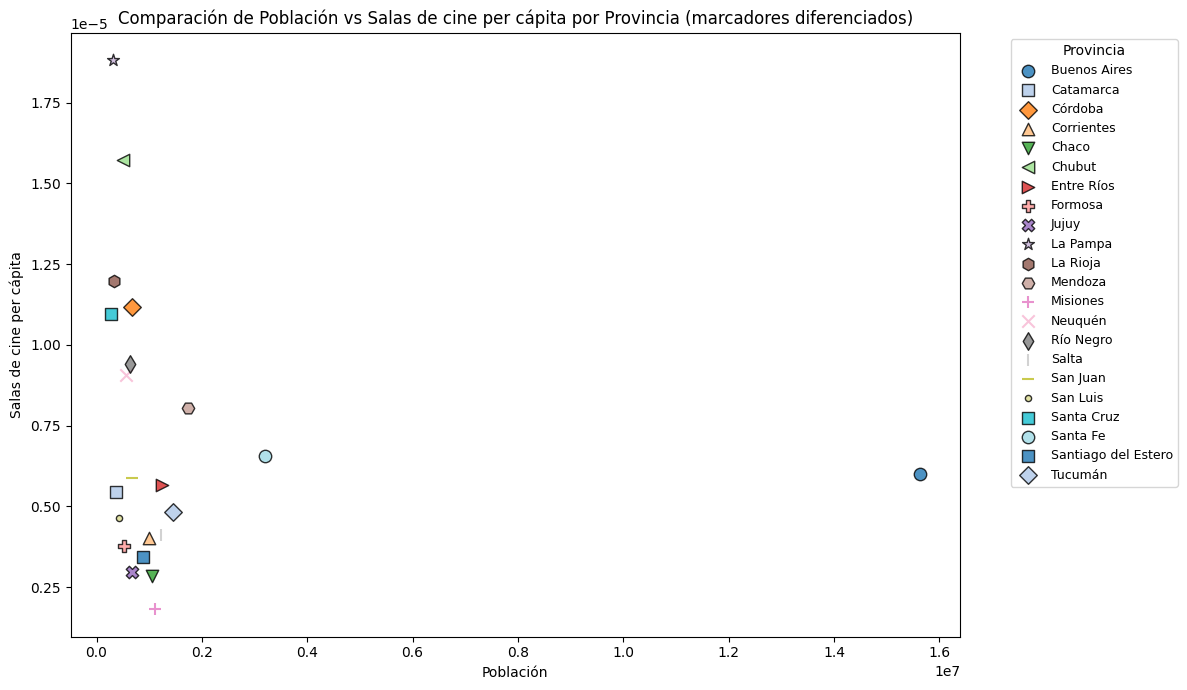

In [ ]:
# Gráfico de dispersión que compara la población con las salas de cine per cápita, usando diferentes marcadores para cada provincia

plt.figure(figsize=(12, 7))

# Crear una lista de marcadores y colores
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'P', 'X', '*', 'h', 'H', '+', 'x', 'd', '|', '_', '.', ',']
colors = sns.color_palette("tab20", n_colors=df_mod["PROVINCIA"].nunique())
marker_cycle = itertools.cycle(markers)
color_cycle = itertools.cycle(colors)

# Graficar cada provincia con un marcador y color diferente
for provincia, color, marker in zip(df_mod["PROVINCIA"].unique(), color_cycle, marker_cycle):
    subset = df_mod[df_mod["PROVINCIA"] == provincia]
    plt.scatter(subset["pop"], subset["movie_theatres_per_cap"], label=provincia, color=color, marker=marker, s=80, edgecolor='black', alpha=0.8)

plt.xlabel("Población")
plt.ylabel("Salas de cine per cápita")
plt.title("Comparación de Población vs Salas de cine per cápita por Provincia (marcadores diferenciados)")
plt.legend(title="Provincia", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

C:\Users\diren\AppData\Local\Temp\ipykernel_23124\484929130.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(subset["pop"], subset["Score"], label=provincia, color=color, marker=marker, s=80, edgecolor='black', alpha=0.8)
C:\Users\diren\AppData\Local\Temp\ipykernel_23124\484929130.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(subset["pop"], subset["Score"], label=provincia, color=color, marker=marker, s=80, edgecolor='black', alpha=0.8)
C:\Users\diren\AppData\Local\Temp\ipykernel_23124\484929130.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('|').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This b

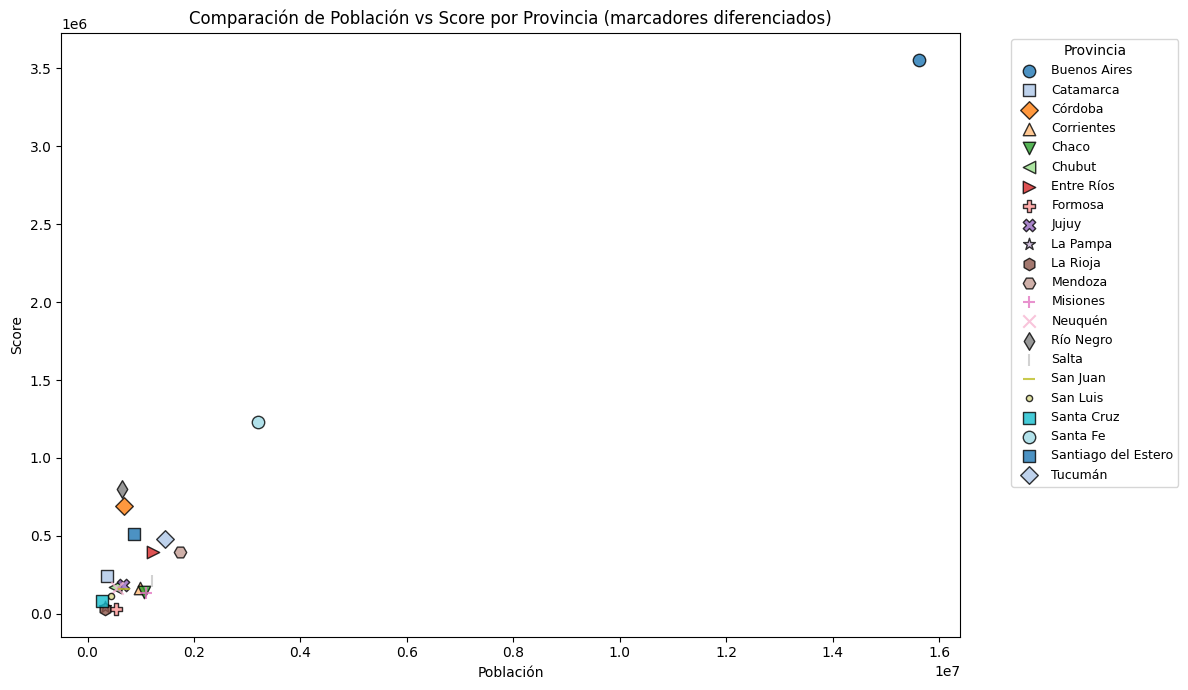

In [ ]:
# Gráfico de dispersión que compara la población con el score, usando diferentes marcadores para cada provincia

plt.figure(figsize=(12, 7))

# Crear una lista de marcadores y colores
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'P', 'X', '*', 'h', 'H', '+', 'x', 'd', '|', '_', '.', ',']
colors = sns.color_palette("tab20", n_colors=df_mod["PROVINCIA"].nunique())
marker_cycle = itertools.cycle(markers)
color_cycle = itertools.cycle(colors)

# Graficar cada provincia con un marcador y color diferente
for provincia, color, marker in zip(df_mod["PROVINCIA"].unique(), color_cycle, marker_cycle):
    subset = df_mod[df_mod["PROVINCIA"] == provincia]
    plt.scatter(subset["pop"], subset["Score"], label=provincia, color=color, marker=marker, s=80, edgecolor='black', alpha=0.8)

plt.xlabel("Población")
plt.ylabel("Score")
plt.title("Comparación de Población vs Score por Provincia (marcadores diferenciados)")
plt.legend(title="Provincia", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

In [ ]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PROVINCIA               22 non-null     object 
 1   gdp                     22 non-null     float64
 2   illiteracy              20 non-null     float64
 3   poverty                 20 non-null     float64
 4   deficient_infra         20 non-null     float64
 5   school_dropout          22 non-null     float64
 6   no_healthcare           20 non-null     float64
 7   birth_mortal            20 non-null     float64
 8   pop                     22 non-null     float64
 9   movie_theatres_per_cap  22 non-null     float64
 10  doctors_per_cap         22 non-null     float64
 11  Score                   22 non-null     float64
 12  poverty_index           22 non-null     object 
 13  N_pop                   22 non-null     float64
 14  nivel_pop               22 non-null     obje

C:\Users\diren\AppData\Local\Temp\ipykernel_23124\572038143.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(subset["pop"], subset["no_healthcare"], label=provincia, color=color, marker=marker, s=80, edgecolor='black', alpha=0.8)
C:\Users\diren\AppData\Local\Temp\ipykernel_23124\572038143.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(subset["pop"], subset["no_healthcare"], label=provincia, color=color, marker=marker, s=80, edgecolor='black', alpha=0.8)
C:\Users\diren\AppData\Local\Temp\ipykernel_23124\572038143.py:14: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('|').  Matplotlib is ignoring the edgecolor in favor of the fa

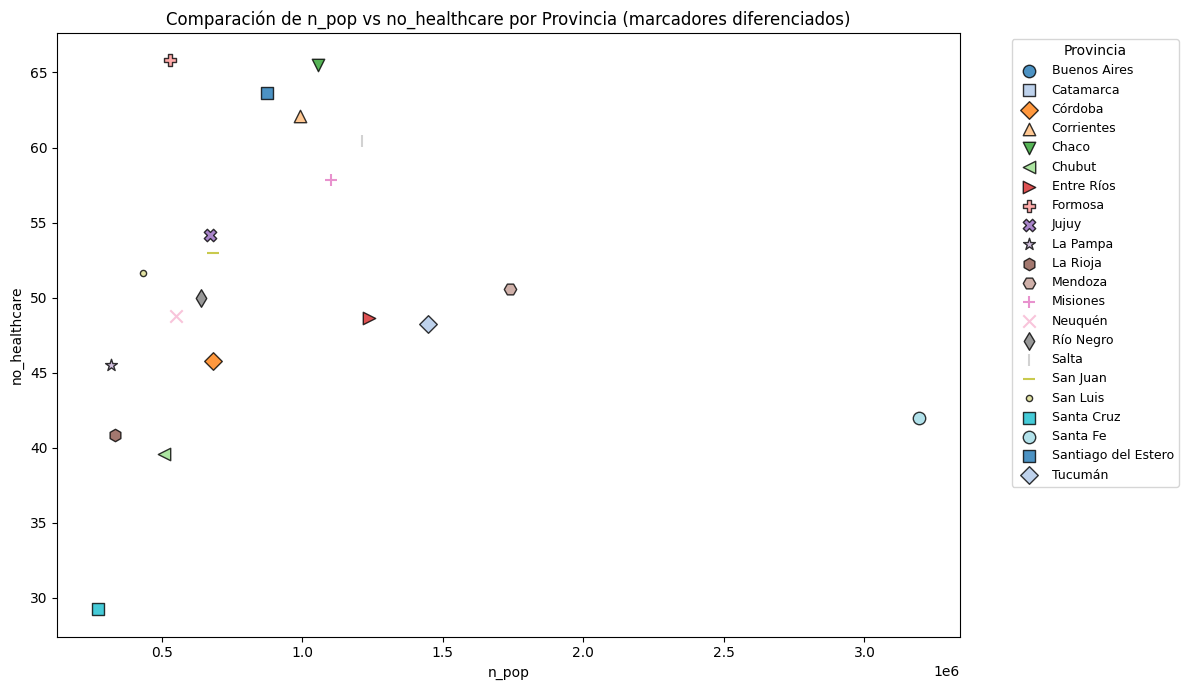

In [ ]:
# Gráfico de dispersión que compara n_pop con no_healthcare, usando diferentes marcadores para cada provincia

plt.figure(figsize=(12, 7))

# Crear una lista de marcadores y colores
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'P', 'X', '*', 'h', 'H', '+', 'x', 'd', '|', '_', '.', ',']
colors = sns.color_palette("tab20", n_colors=df_mod["PROVINCIA"].nunique())
marker_cycle = itertools.cycle(markers)
color_cycle = itertools.cycle(colors)

# Graficar cada provincia con un marcador y color diferente
for provincia, color, marker in zip(df_mod["PROVINCIA"].unique(), color_cycle, marker_cycle):
    subset = df_mod[df_mod["PROVINCIA"] == provincia]
    plt.scatter(subset["pop"], subset["no_healthcare"], label=provincia, color=color, marker=marker, s=80, edgecolor='black', alpha=0.8)

plt.xlabel("n_pop")
plt.ylabel("no_healthcare")
plt.title("Comparación de n_pop vs no_healthcare por Provincia (marcadores diferenciados)")
plt.legend(title="Provincia", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

In [9]:
df_mod.to_csv('data frame tablas.csv', index=False)